In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [126]:
cnv_data = pd.read_csv('/Volumes/mgps-data/ngs_data/results/220715_NB552650_0019_AHHM7KAFX3/cnvkit_results/VAL22_389_13_9.realigned.cnr', sep='\t', header=0)

In [127]:
cnv_data.head(5)

,chromosome,start,end,gene,depth,log2,weight
0,chr1,10500,207166,Antitarget,0.260518,-0.313437,0.936839
1,chr1,258166,297468,Antitarget,0.385069,0.309242,0.911182
2,chr1,348468,535488,Antitarget,0.238830,-0.059700,0.994063
3,chr1,586488,628569,Antitarget,0.203607,-0.359720,0.910043
4,chr1,635491,779407,Antitarget,0.283381,0.103481,0.979158


In [128]:
cnv_data.describe()

,start,end,depth,log2,weight
count,2.861700e+04,2.861700e+04,28617.000000,28617.000000,28617.000000
mean,7.810377e+07,7.820467e+07,358.091029,-0.030101,0.967402
std,5.561091e+07,5.561273e+07,634.889366,0.801606,0.046151
min,1.050000e+04,1.051580e+05,0.000000,-17.736900,0.093612
25%,3.375215e+07,3.390370e+07,0.209209,-0.111472,0.966334
50%,6.726639e+07,6.741667e+07,0.262285,0.006830,0.978096
75%,1.145166e+08,1.146713e+08,597.494000,0.124433,0.985519
max,2.487959e+08,2.489459e+08,3668.270000,6.682870,0.997060


In [129]:
clean_cnv_data = cnv_data.loc[cnv_data['gene'] != 'Antitarget']
clean_cnv_data.reset_index(inplace=True, drop=True)
clean_cnv_data.reset_index(inplace=True)

In [130]:
clean_cnv_data['log2'].max()

1.1321

In [131]:
print(clean_cnv_data['chromosome'].nunique())

23


In [132]:
colors = sns.color_palette('hls', 15)
for color in colors:
    intcolor = tuple(int(x * 255) for x in color)
    print('#%02x%02x%02x' % intcolor)
sns.color_palette('hls', 15)

#db5e56
#db9356
#dbc856
#b8db56
#83db56
#56db5e
#56db93
#56dbc8
#56b8db
#5683db
#5e56db
#9356db
#c856db
#db56b8
#db5683


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5791999999999999, 0.33999999999999997),
 (0.86, 0.7872, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.5167999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7872000000000001),
 (0.33999999999999997, 0.7247999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5791999999999999, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7247999999999996),
 (0.86, 0.33999999999999997, 0.5167999999999995)]

In [133]:
def get_chr_x_axis_ticks():
    chromosomes = list(clean_cnv_data['chromosome'].drop_duplicates())
    wg_x_tick_points = []
    chr_boundaries = []
    for chromosome in chromosomes:
        chr_cnv_idx = clean_cnv_data.loc[clean_cnv_data['chromosome'] == chromosome]['index']
        start_idx = list(chr_cnv_idx[:1])[0]
        end_idx = list(chr_cnv_idx[-1:])[0]
        chr_boundaries.extend([start_idx, end_idx])
        idx_range = chr_cnv_idx.count()
        if idx_range > 0:
            mid_point = 0
            if idx_range % 2 == 0:
                mid_point = int(idx_range / 2)
            else:
                mid_point = int(idx_range / 2 + 0.5)
            mid_idx = start_idx + mid_point
            wg_x_tick_points.append(mid_idx)
    return chromosomes, wg_x_tick_points, chr_boundaries

In [134]:
def get_gene_x_axis_ticks(chr_cnv_data):
    genes = list(chr_cnv_data['gene'].drop_duplicates())
    chr_x_tick_points = []
    gene_boundaries = []
    end_idx = 0
    for gene in genes:
        gene_cnv_idx = chr_cnv_data.loc[chr_cnv_data['gene'] == gene]['index']
        start_idx = list(gene_cnv_idx[:1])[0]
        end_idx = list(gene_cnv_idx[-1:])[0]
        gene_boundaries.append(start_idx)
        idx_range = gene_cnv_idx.count()
        if idx_range > 0:
            mid_point = 0
            if idx_range % 2 == 0:
                mid_point = int(idx_range / 2)
            else:
                mid_point = int(idx_range / 2 + 0.5)
            mid_idx = start_idx + mid_point
            chr_x_tick_points.append(mid_idx)
    gene_boundaries.append(end_idx)
    return genes, chr_x_tick_points, gene_boundaries

In [135]:
# set figure size
sns.set(rc={"figure.figsize": (26, 8)})
# set plot theme
sns.set_style('white')
# set colore palate based on number of hue elements
c_palette = ['#db5e56', '#56db5e', '#5784DB', '#DB9457', '#57DB94', '#9457DB', '#57B9DB', '#DBC957', '#DB5784', '#1C1B1B']
c_palette = c_palette * int(clean_cnv_data['chromosome'].nunique() / len(c_palette))
c_palette.extend(c_palette[:clean_cnv_data['chromosome'].nunique() % len(c_palette)])
# get the positions for the x axis ticks and their labels
chromosomes, x_tick_pos, vline_positions = get_chr_x_axis_ticks()

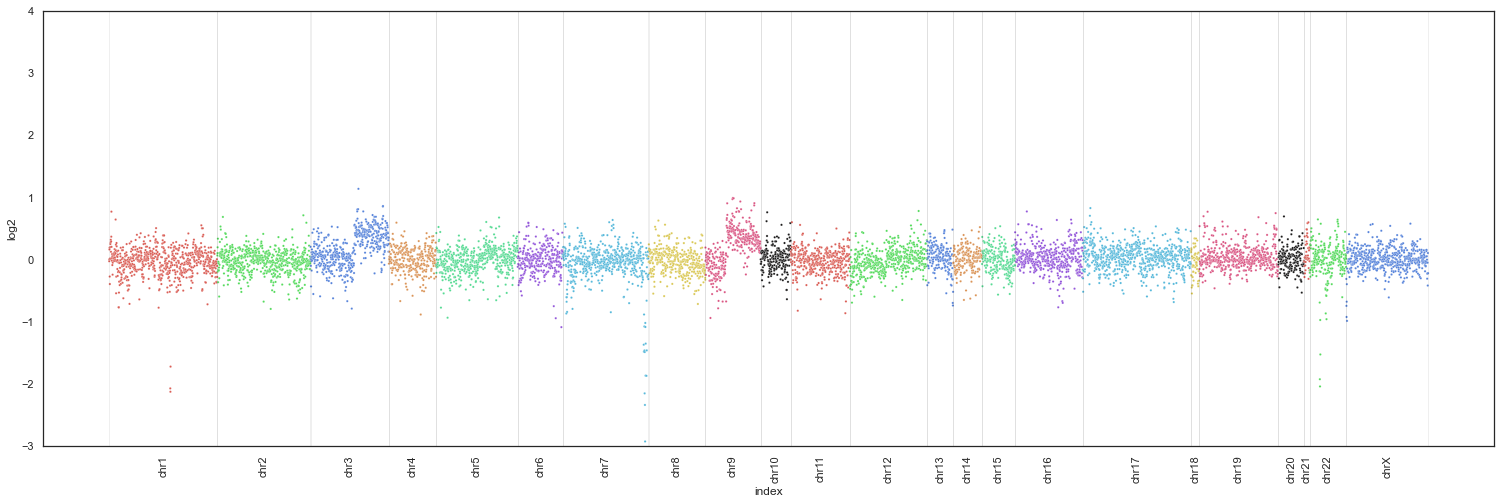

In [138]:
ax = sns.scatterplot(x = 'index', y = 'log2', hue = 'chromosome', data = clean_cnv_data, s = 5, legend = False, palette=c_palette)
plt.xticks(x_tick_pos, chromosomes)
ax.set_xticklabels(labels = chromosomes, rotation=90)
for pos in vline_positions:
    ax.axvline(x=pos, color='black', linewidth=0.6, alpha=0.1)
# set y axis range
ymin = -3
ymax = clean_cnv_data['log2'].max()
if ymax < 4:
    ymax = 4
else:
    ymax += 1
ax.set(ylim=(ymin, ymax))
#plt.show()
plt.savefig('/Volumes/mgps-data/ngs_data/results/220715_NB552650_0019_AHHM7KAFX3/cnvkit_results/VAL22_389_13_9_wg_cnv.png', dpi=300)

In [100]:
def draw_per_chr_plot(chromosome: str):
    chr_cnv = clean_cnv_data.loc[clean_cnv_data['chromosome'] == chromosome]
    c_palette = ['#db5e56', '#56db5e', '#5784DB', '#DB9457', '#57DB94', '#9457DB', '#57B9DB', '#DBC957', '#DB5784', '#1C1B1B']
    c_palette = c_palette * int(chr_cnv['gene'].nunique() / len(c_palette))
    c_palette.extend(c_palette[:chr_cnv['gene'].nunique() % len(c_palette)])
    # get the plot axis object
    ax = sns.scatterplot(x = 'index', y = 'log2', hue = 'gene', data = chr_cnv, s = 20, legend = False, palette=c_palette)
    # get the x-axis gene list and index positions
    genes, x_tick_pos, gene_vline_positions = get_gene_x_axis_ticks(chr_cnv)
    for pos in gene_vline_positions:
        ax.axvline(x=pos, color='black', linewidth=0.6, alpha=0.1)
    plt.xticks(x_tick_pos, genes)
    ax.set_xticklabels(labels = genes, rotation=90)
    # set y axis range
    ymin = -3
    ymax = chr_cnv['log2'].max()
    if ymax < 4:
        ymax = 4
    else:
        ymax += 1
    ax.set(ylim=(ymin, ymax))
    plt.show()

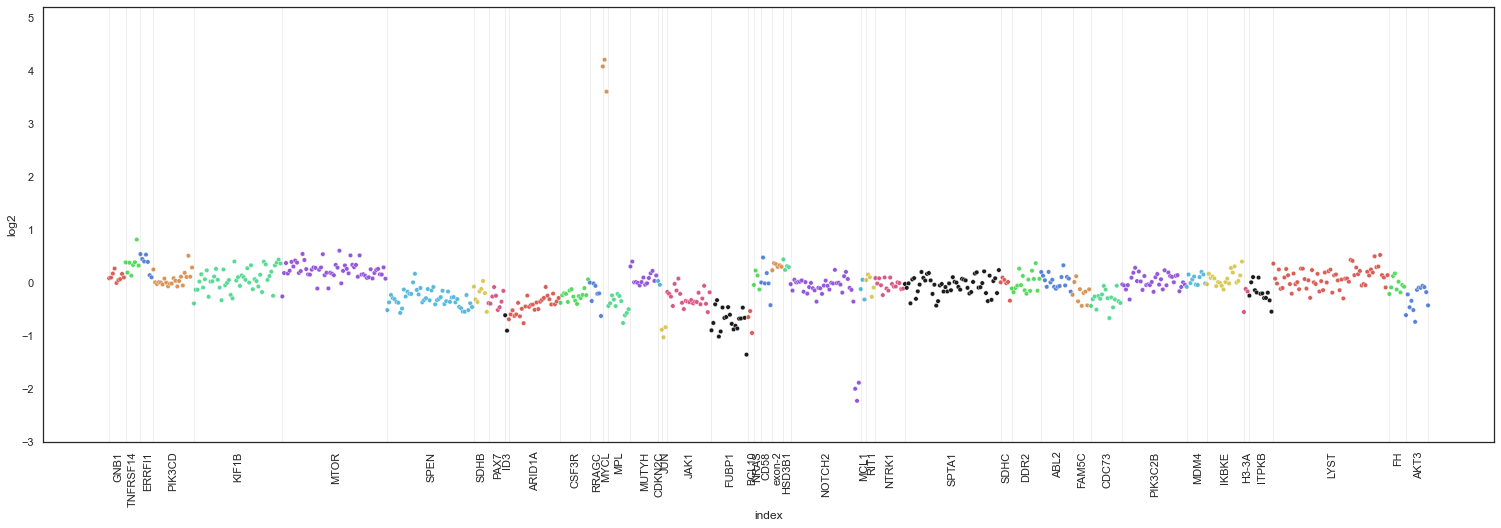

In [88]:
draw_per_chr_plot('chr1')

In [18]:
c_palette = ['#db5e56', '#56db5e', '#5784DB', '#DB9457', '#57DB94', '#9457DB', '#57B9DB', '#DBC957', '#DB5784', '#1C1B1B']
c_palette[:4]

['#db5e56', '#56db5e', '#5784DB', '#DB9457']

In [19]:
chromosomes = list(clean_cnv_data['chromosome'].drop_duplicates())
wg_x_tick_points = []
for chromosome in chromosomes:
    chr_cnv_idx = clean_cnv_data.loc[clean_cnv_data['chromosome'] == chromosome]['index']
    idx_range = chr_cnv_idx.count()
    if idx_range > 0:
        mid_point = 0
        if idx_range % 2 == 0:
            mid_point = int(idx_range / 2)
        else:
            mid_point = int(idx_range / 2 + 0.5)
        mid_idx = list(chr_cnv_idx[:1])[0] + mid_point
        wg_x_tick_points.append(mid_idx)
print(wg_x_tick_points)    
# chr_index_col = chr_cnv['index']
# chr_cnv_len = index_col.count()
# chr_cnv_mid_idx = 0
# if chr_cnv_len % 2 == 0:
#     chr_cnv_mid_idx = chr_cnv_len / 2
# else:
#     chr_cnv_mid_idx = chr_cnv_len / 2 + 0.5
# print(int(chr_cnv_mid_idx) + list(index_col[:1])[0])
# print(index_col)

[359, 1026, 1595, 2011, 2438, 2857, 3291, 3764, 4135, 4418, 4713, 5165, 5508, 5690, 5895, 6228, 6811, 7198, 7488, 7834, 7938, 8078, 8471]


In [111]:
chr_cnv['index']
#chr_cnv['index'][:1]
chr_cnv['index'][-1:]

5420    5420
Name: index, dtype: int64